In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

%matplotlib inline

# Some Numpy tasks

Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

Length: 12
Sum of elements: 15.000000000000007


<Axes: ylabel='Count'>

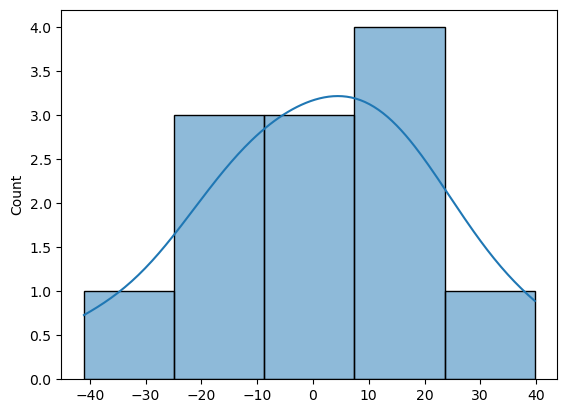

In [5]:
my_array = np.random.normal(0,1,12)
my_array = my_array.dot(15 / my_array.sum())

# X ~ N(0,1) => cX(0, c^2)

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

sns.histplot(my_array, kde=True)


Create two random arrays $a$ and $b$ with the same length.

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [6]:
def calculate_manhattan(a, b):
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum(np.square(a - b)))
    return distance

def calculate_chebyshev(a, b):
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):
    distance = 1 - a.T.dot(b) / np.sqrt(a.T.dot(a) * b.T.dot(b))
    return distance

In [7]:
a = np.random.randint(low=1, high=10, size=3)
b = np.random.randint(low=1, high=10, size=3)
print(a,b)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

[4 5 7] [5 4 5]
Manhattan distance: 4
Euclidean distance: 2.449489742783178
Chebyshev distance: 2
Cosine distance: 0.026876319798096238


Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [8]:
def transform(array):
    array_min, array_max = np.min(array), np.max(array)
    transformed_array = (array - array_min) / (array_max - array_min)
    transformed_array = transformed_array * (16) - 6
    return transformed_array

In [9]:
my_array = np.random.randint(low=-50, high=50, size=42)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -6.0
Max: 10.0
Array:
[ 6.92929293 -4.06060606 -0.50505051  6.60606061  6.28282828  3.37373737
  4.98989899  9.35353535 -1.95959596  5.47474747  8.54545455  7.8989899
 -3.57575758  1.11111111 -1.7979798  -6.          0.3030303   2.56565657
 -2.12121212  9.19191919  2.08080808 -6.          5.15151515 -3.25252525
  2.72727273  3.85858586 -5.35353535 -0.18181818  4.18181818 -2.92929293
  8.38383838 -5.19191919 -2.60606061  6.60606061 -1.7979798  10.
 -5.35353535  0.62626263  4.18181818  3.6969697  -2.60606061 -0.98989899]


Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [10]:
my_array = np.random.randint(low=-12, high=5, size=(10,3))
selected_column = np.argmin(my_array) % 3 # Not necessarily the first one that contains min
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[ -6  -9  -2]
 [ -9   1  -4]
 [  2 -11  -1]
 [  4  -4  -4]
 [  4  -1 -12]
 [-12  -8   3]
 [-10   1   4]
 [  1  -3   3]
 [ -7   4  -4]
 [  4   0  -5]]
Selected column: 2


Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [11]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.97148884 0.3089192  0.62185798        nan 0.98966052        nan
        nan        nan 0.93926467 0.4794525 ]


In [12]:
def replace_missing(arr):
    nan_median = np.nanmedian(arr)
    quantile = np.nanquantile(arr, nan_median)
    array_without_missing = np.nan_to_num(arr, nan=quantile)
    return array_without_missing

In [13]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.97148884 0.3089192  0.62185798 0.96835686 0.98966052 0.96835686
 0.96835686 0.96835686 0.93926467 0.4794525 ]


**Answer:** Nanmedian function calculates median-value of the given array ignoring nan's, which is generally one of the more appropriate options. We should replace nans in a given array and preserve the overall distribution and characteristics of the data. Basically, we replacing with a central tendency measure.


Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [14]:
def stats_channel(X):
    median = np.median(X, axis=(0,1))
    std = np.median(X, axis=(0,1))
    return median, std

In [15]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-2., -4., -3.]), array([-2., -4., -3.]))


# Pandas & Visualization


We are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

In [16]:
dataset = pd.read_csv('titanic.csv', index_col=0)
dataset.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [17]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [19]:
dataset.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

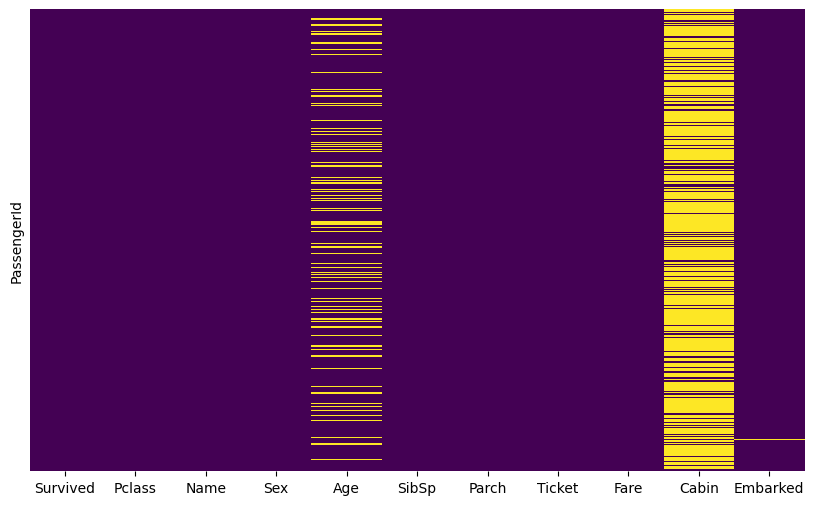

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Analyzing info we notice that there are missing values in columns:
* **Age**
* **Cabin**
* **Embarked**

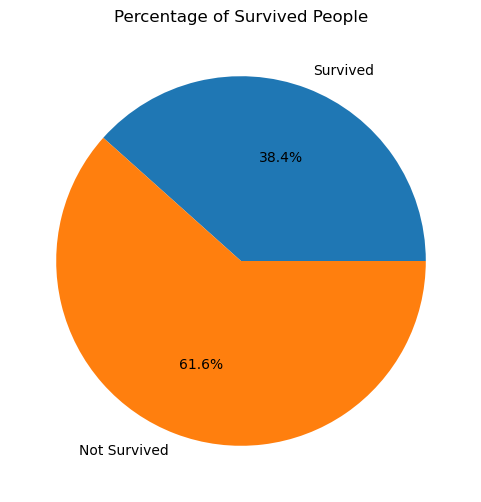

In [21]:
survived_percentage = dataset['Survived'].mean() * 100
print()

plt.figure(figsize=(6, 6))
plt.title('Percentage of Survived People')
plt.pie([survived_percentage, 100 - survived_percentage], labels=['Survived', 'Not Survived'], autopct='%1.1f%%')
plt.show()

In [22]:
class_counts = dataset['Survived'].value_counts()
print('threshold 20%')
if abs(class_counts[0] - class_counts[1]) <= (class_counts.sum() * 0.2):
    print("balanced balanced")
else:
    print("not balanced")

threshold 20%
not balanced


The percentage of survived passengers is **38.4%**.
The absolute difference between classes is more than **20%**, so let's consider it **not** balanced.

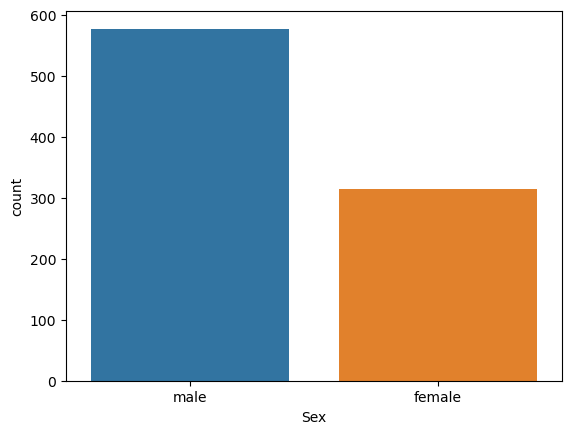

In [23]:
sns.countplot(x='Sex', data=dataset)
plt.xlabel('Sex')
plt.show()

There were more **males** on titanic.

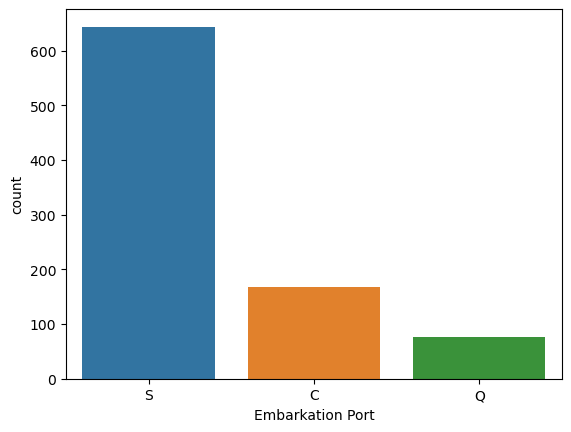

In [24]:
sns.countplot(x='Embarked', data=dataset)
plt.xlabel('Embarkation Port')
plt.show()

**Queenstown** is the least popular.

In [25]:
pclasses = dataset['Pclass'].unique()
print('Number of different passenger classes', len(pclasses))

Number of different passenger classes 3


Avg overall:  32.204207968574636
Avg for each Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


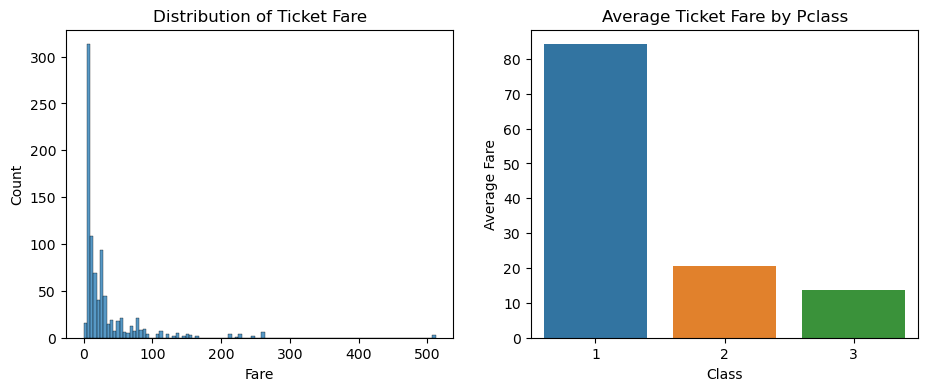

In [26]:
overall_avg_fare = dataset['Fare'].mean()
avg_fare_by_class = dataset.groupby('Pclass')['Fare'].mean()
print('Avg overall: ', overall_avg_fare)
print('Avg for each', avg_fare_by_class)

plt.figure(figsize=(11, 4))

plt.subplot(121)
sns.histplot(dataset['Fare'])
plt.title('Distribution of Ticket Fare')

plt.subplot(122)
sns.barplot(x=avg_fare_by_class.index, y=avg_fare_by_class)
plt.title('Average Ticket Fare by Pclass')
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.show()

Minimal age:  0.42
Maximum age:  80.0


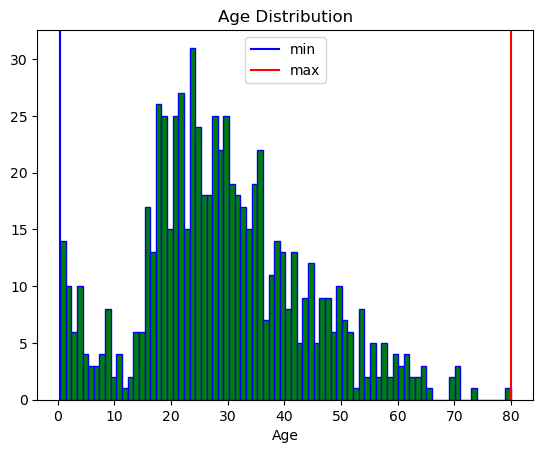

In [27]:
age = dataset['Age']
age_min = age.min()
age_max = age.max()
print('Minimal age: ', age_min)
print('Maximum age: ', age_max)

plt.hist(age, bins=80, color='green', edgecolor='blue')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.axvline(age_min, color='blue', label='min')
plt.axvline(age_max, color='red', label='max')
plt.legend()
plt.show()

In [28]:
median_age = age.median()

male_age = age[dataset['Sex'] == 'male']
female_age = age[dataset['Sex'] == 'female']

median_male = male_age.median()
median_female = female_age.median()

print('Median age: ', median_age)
print('Median male age: ', median_male)
print('Median female age: ', median_female)

Median age:  28.0
Median male age:  29.0
Median female age:  27.0


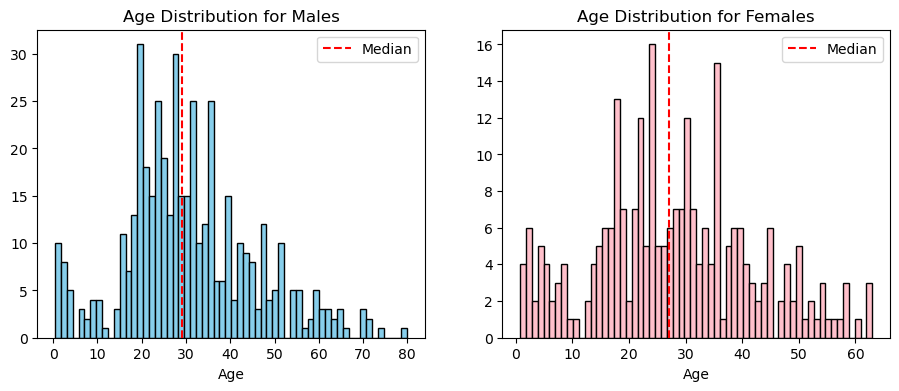

In [29]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.hist(male_age, bins=60, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.title('Age Distribution for Males')
plt.axvline(median_male, color='red', linestyle='--', label='Median')
plt.legend()

plt.subplot(122)
plt.hist(female_age, bins=60, color='pink', edgecolor='black')
plt.xlabel('Age')
plt.title('Age Distribution for Females')
plt.axvline(median_female, color='red', linestyle='--', label='Median')
plt.legend()
plt.show()


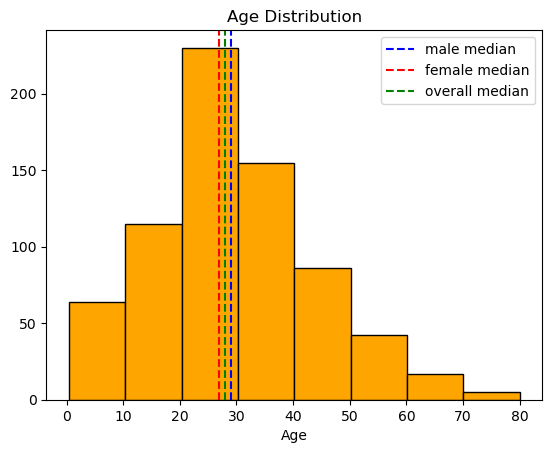

In [30]:
plt.hist(age, bins=8, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.axvline(median_male, color='blue', linestyle='--', label='male median')
plt.axvline(median_female, color='red', linestyle='--', label='female median')
plt.axvline(median_age, color='green', linestyle='--', label='overall median')
plt.legend()
plt.show()

Median for male passengers is slightly above the overall median and for females is slightly under. **29** and **27** for M and F respectively are pretty similar to each other. And just peeking on the graphics we can assume that there are more young (<15) females percentage wise.

### Analyzing the titles of the passengers (example, *Capt., Mr.,Mme.*)

In [31]:
titles = dataset['Name'].str.extract('([A-Za-z]+)\.')
unique_titles = titles[0].unique()
unique_titles_number = len(unique_titles)
print(unique_titles)
print('\nNumber of unique titles: ', unique_titles_number)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']

Number of unique titles:  17


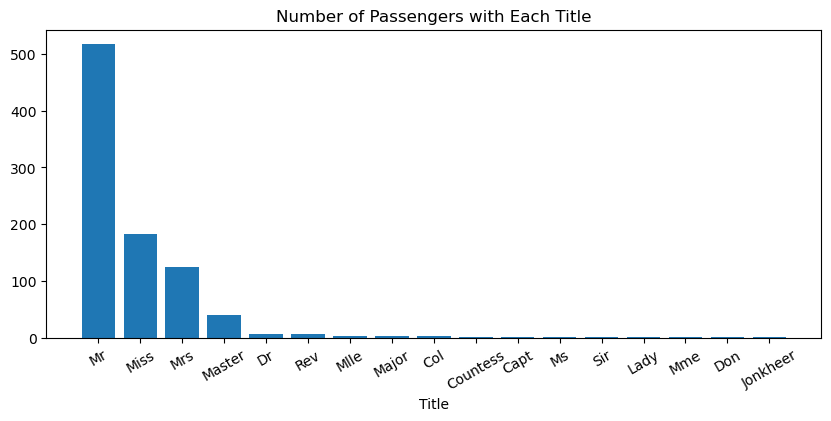

0
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [32]:
title_counts = titles[0].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(title_counts.index, title_counts.values)
plt.xticks(rotation=30)
plt.xlabel('Title')
plt.title('Number of Passengers with Each Title')
plt.show()

title_counts

In [33]:
men_titles = titles[dataset['Sex'] == 'male']
man_popular = men_titles[0].value_counts().idxmax()

women_titles = titles[dataset['Sex'] == 'female']
woman_popular = women_titles[0].value_counts().idxmax()

print("Most popular title for man is:", man_popular)
print("Most popular title for woman is:", woman_popular)

Most popular title for man is: Mr
Most popular title for woman is: Miss


### Let's figure out if there is a correlation between *pclass* and *ticket price*.

In [34]:
mean_prices = dataset.groupby('Pclass')['Fare'].mean()
mean_prices

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

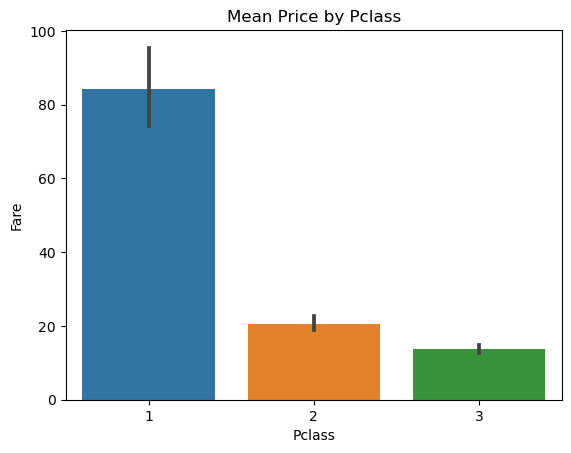

In [35]:
sns.barplot(x='Pclass', y='Fare', data=dataset)
plt.title('Mean Price by Pclass')
plt.show()

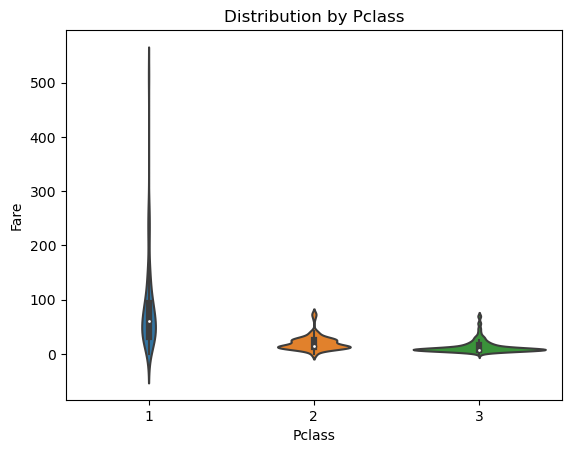

In [36]:
sns.violinplot(x='Pclass', y='Fare', data=dataset)
plt.title('Distribution by Pclass')
plt.show()

The mean ticket price increases with increasing class as the barplot shows. We can clearly see a correlation. 

**Higher class passengers tend to have higher ticket prices.**

The violin plot provides the information that first-class tickets have a wider range of prices compared to second and third class.

In [37]:
print('corr:', dataset['Fare'].corr(dataset['Pclass']))

corr: -0.5494996199439082


### Same for *embarked* and *ticket priсe*.

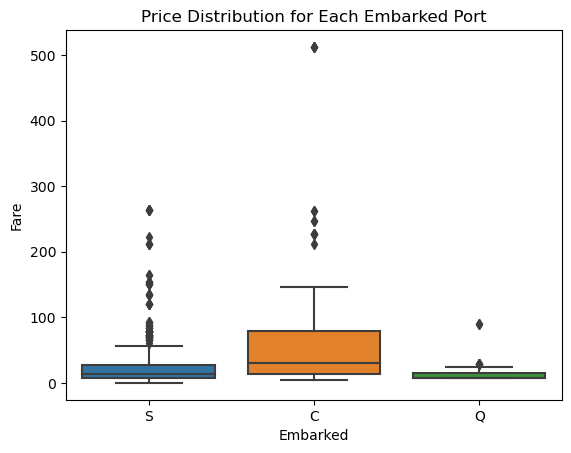

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


In [38]:
data = dataset[['Embarked', 'Fare']]
mean_prices = data.groupby('Embarked')['Fare'].mean()

sns.boxplot(x='Embarked', y='Fare', data=data)
plt.title('Price Distribution for Each Embarked Port')
plt.show()

print(mean_prices)

In [39]:
dataset['Embarked'] = dataset['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print('corr:', dataset['Fare'].corr(dataset['Embarked']))

corr: -0.22631118369626857


The median fare is higher for **Cherbourg** and the price range is wider than for other two.

For **Queenstown** the median and the price range are the smallest.

We can make a conclusion that embarked port probably has an influence on the ticket fare. Passengers with **C** tend to have the highest ticket prices and passengers with **Q** tend to have the lowest.

### Age distributions

In [40]:
survived = dataset[dataset['Survived'] == 1]
not_survived = dataset[dataset['Survived'] == 0]

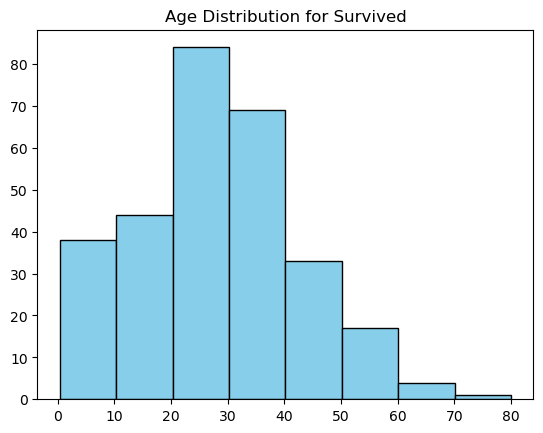

In [41]:
plt.hist(survived['Age'].dropna(), bins=8, color='skyblue', edgecolor='black', label='Survived')
plt.title('Age Distribution for Survived')
plt.show()

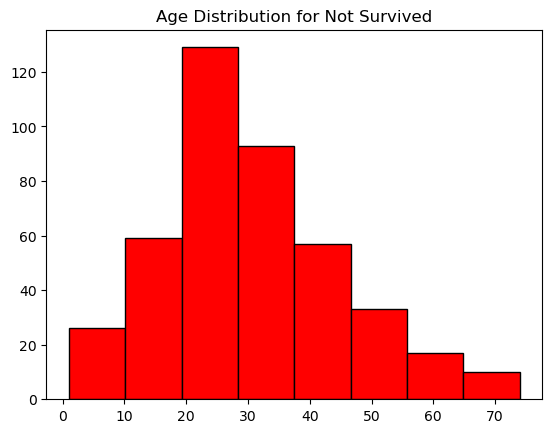

In [42]:
plt.hist(not_survived['Age'].dropna(), bins=8, color='red', edgecolor='black', label='Not survived')
plt.title('Age Distribution for Not Survived')
plt.show()

In [43]:
mean_age_survived = survived['Age'].mean()
mean_age_not_survived = not_survived['Age'].mean()

print("Mean age for survived:", mean_age_survived)
print("Mean age for not survived:", mean_age_not_survived)

Mean age for survived: 28.343689655172415
Mean age for not survived: 30.62617924528302


In [44]:
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
dataset['AgeGroup'] = pd.cut(dataset['Age'], range(0, 90, 10), labels=age_groups)
age_survival = dataset[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean'])
age_survival

,Survived
,mean
AgeGroup,
1-10,0.593750
11-20,0.382609
21-30,0.365217
31-40,0.445161
41-50,0.383721
51-60,0.404762
61-70,0.235294
71-80,0.200000


As we can see, more children survived and the mean age for survived passengers seems to be lower. Although both distributions have the same peak of 20-30 age group.

*Strannaya formulirovka dlya sexov, no vidimo imeet smysl sdelat' tak:

In [45]:
male_survived = dataset[(dataset["Sex"] == "male") & (dataset["Survived"] == 1)]
male_not_survived = dataset[(dataset["Sex"] == "male") & (dataset["Survived"] == 0)]
female_survived = dataset[(dataset["Sex"] == "female") & (dataset["Survived"] == 1)]
female_not_survived = dataset[(dataset["Sex"] == "female") & (dataset["Survived"] == 0)]

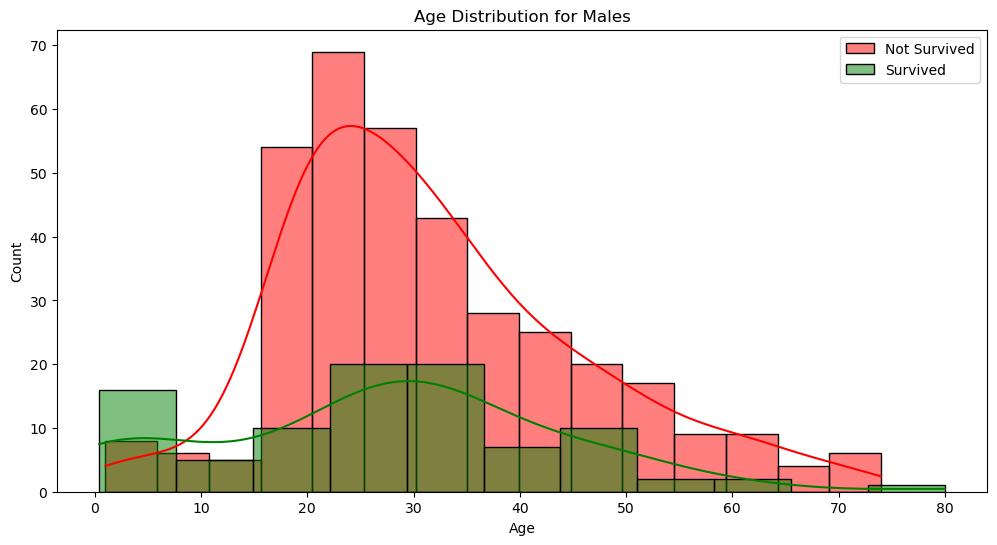

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(male_not_survived["Age"], label="Not Survived", color="red", kde=True)
sns.histplot(male_survived["Age"], label="Survived", color="green", kde=True)
plt.title("Age Distribution for Males")
plt.legend()
plt.show()

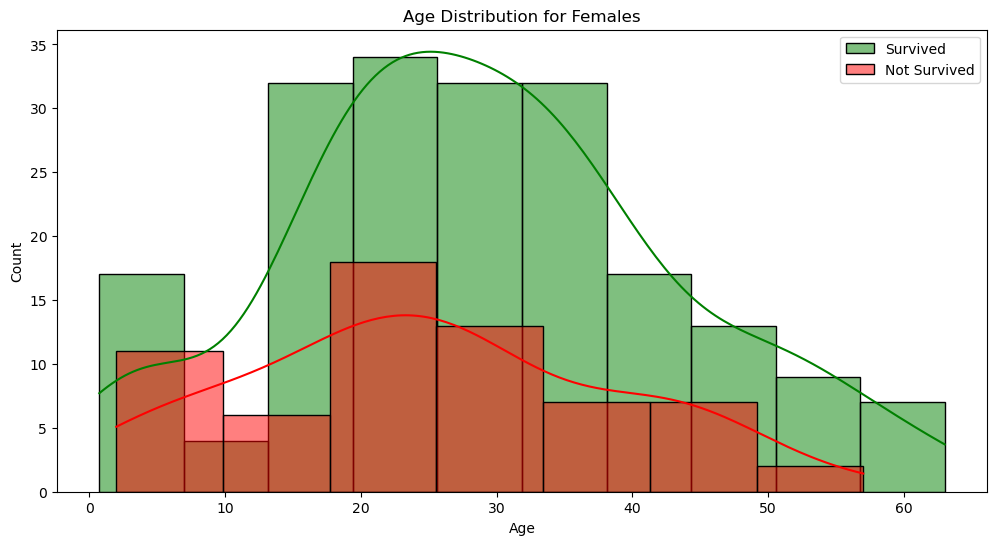

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(female_survived["Age"], label="Survived", color="green", kde=True)
sns.histplot(female_not_survived["Age"], label="Not Survived", color="red", kde=True)
plt.title("Age Distribution for Females")
plt.legend()
plt.show()

In [48]:
mean_age_male_survived = male_survived["Age"].mean()
mean_age_male_not_survived = male_not_survived["Age"].mean()
mean_age_female_survived = female_survived["Age"].mean()
mean_age_female_not_survived = female_not_survived["Age"].mean()

print("Mean Age of Survived Males:", mean_age_male_survived)
print("Mean Age of Not Survived Males:", mean_age_male_not_survived)
print("Mean Age of Survived Females:", mean_age_female_survived)
print("Mean Age of Not Survived Females:", mean_age_female_not_survived)

Mean Age of Survived Males: 27.276021505376345
Mean Age of Not Survived Males: 31.618055555555557
Mean Age of Survived Females: 28.84771573604061
Mean Age of Not Survived Females: 25.046875


For all age groups except young children (0-10) sex has a big influence on survival chance. We can now see that the influence of sex on survival is much stronger than it is of age group.